<a href="https://colab.research.google.com/github/avanish04/Bike-Sharing-Demand-Prediction---Capstone-Project/blob/main/Bike_Sharing_Demand_Prediction(Team)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# importing the dataset and necessory libraries


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing importent libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor



In [3]:
#importing the dataset with the help of pandas
demand_df=pd.read_csv('/content/drive/MyDrive/ML capstone bike sharing demand/SeoulBikeData.csv',encoding= 'unicode_escape')


In [4]:
#over view of our dataset
demand_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
demand_df.shape

(8760, 14)

In [6]:
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**from the above outcome our dataset contains float64(6), int64(4), object(4) data types and it has : 8760 rows and 14 features**

In [7]:
demand_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
# percentile list
perc =[.25, .50, .75, .95]
demand_df.describe(percentiles=perc)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
95%,2043.000000,22.000000,30.700000,94.000000,3.700000,2000.000000,22.405000,2.560000,0.400000,0.200000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
demand_df[demand_df.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [10]:
demand_df.isnull().values.any()


False

In [11]:
demand_df.isnull().sum().sum()

0

**from above experiments we can say our dataset doesnot contain null values 
and duplicate values**

# EDA

first making a copy of our original dataset


In [12]:
df=demand_df.copy()

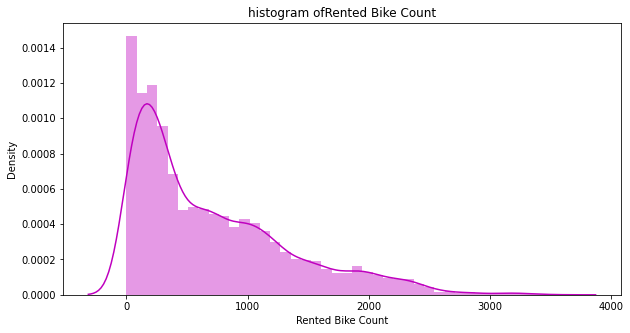

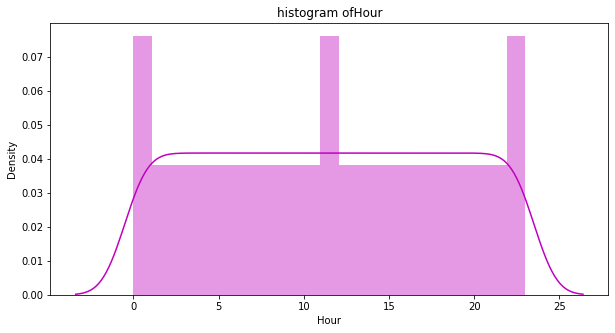

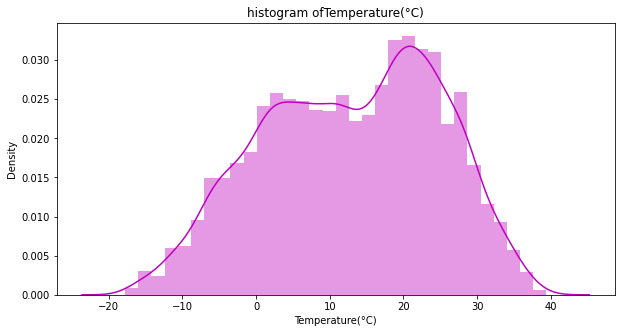

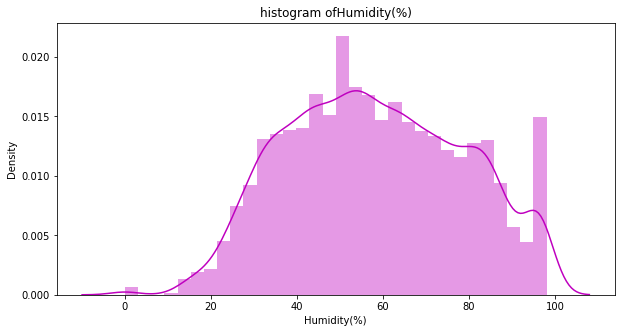

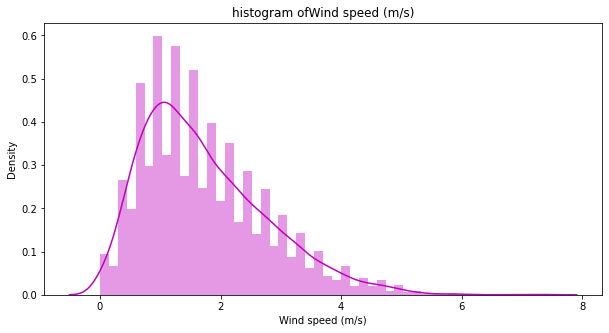

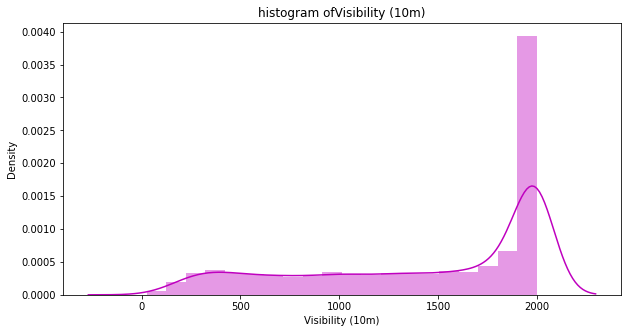

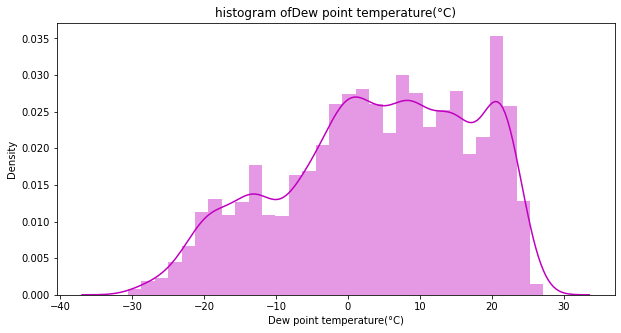

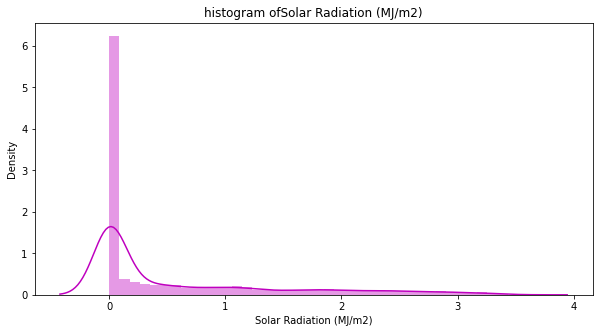

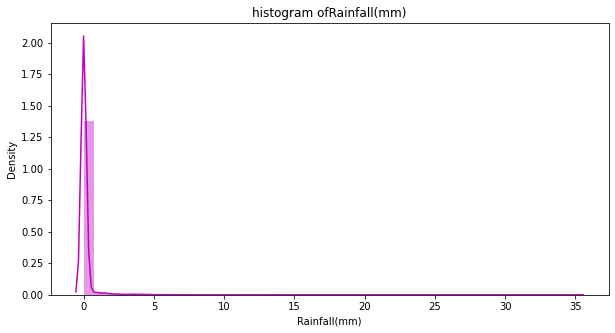

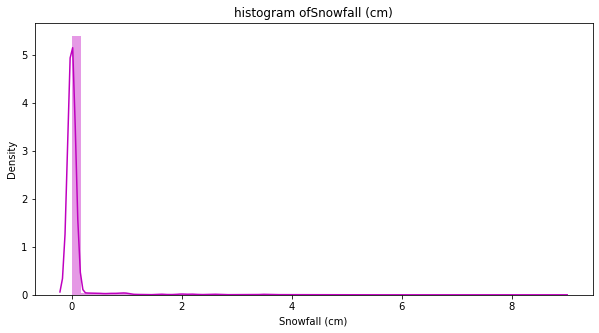

''

In [13]:
# histogram of bike count
for i in list(df.describe().columns):
  plt.rcParams['figure.figsize'] = (10, 5)
  plt.title('histogram of'+i)
  ax=sns.distplot((df[i]),color="m" )
  plt.show()
;

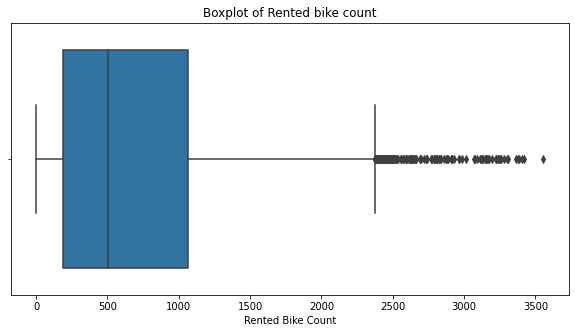

In [14]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Boxplot of Rented bike count')
ax=sns.boxplot(df['Rented Bike Count'])

from the above box plot and the histogram we see that in our rented bike counts contains some outliers.

**outliers treatment**

In [15]:
percentile_q1 = np.percentile(df['Rented Bike Count'],25)
print(percentile_q1)
percentile_q2 = np.percentile(df['Rented Bike Count'],50)
print(percentile_q2)
percentile_q3 = np.percentile(df['Rented Bike Count'],75)
print(percentile_q3)

191.0
504.5
1065.25


In [16]:
IQR=percentile_q3-percentile_q1
print(IQR)
lower_side_outlier=percentile_q1-(1.5)*IQR
print(lower_side_outlier)
upper_side_outlier=percentile_q3+(1.5)*IQR
print(upper_side_outlier)

874.25
-1120.375
2376.625


In [17]:
new_data=df[(df['Rented Bike Count']>lower_side_outlier) & (df['Rented Bike Count']<upper_side_outlier )]

In [18]:
new_data.shape

(8602, 14)

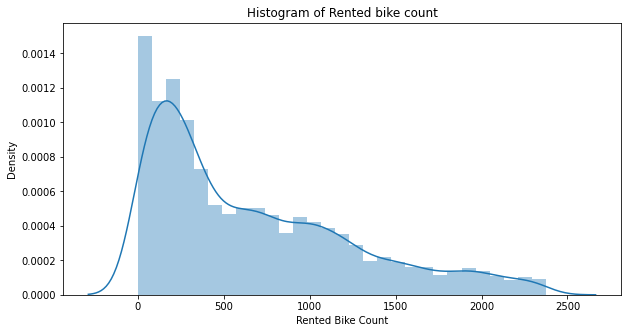

In [19]:
# histogram of bike count
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Histogram of Rented bike count')
ax=sns.distplot(new_data['Rented Bike Count'] )

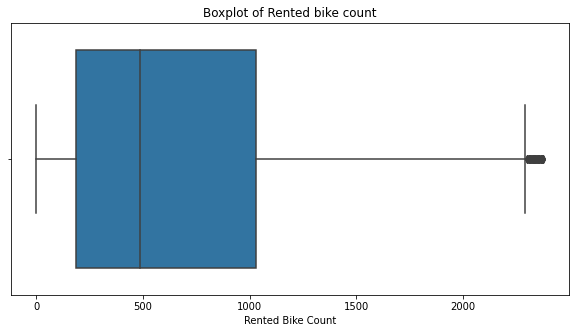

In [20]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Boxplot of Rented bike count')
ax=sns.boxplot(new_data['Rented Bike Count']);

**After the treatment of the outliers we now have 8602 rows as compare to 8760 rows earlier**

In [21]:

#numrical features in our dataset
numerical_features=list(new_data.describe().columns)

In [22]:
numerical_features[1:]

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

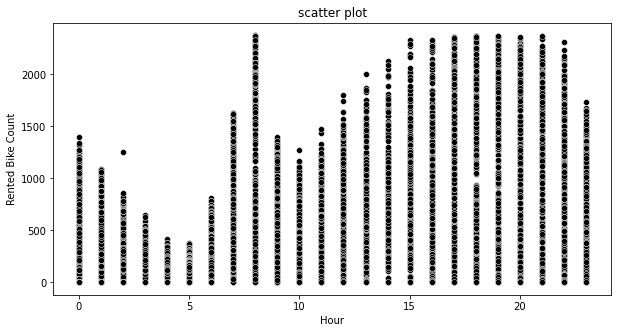

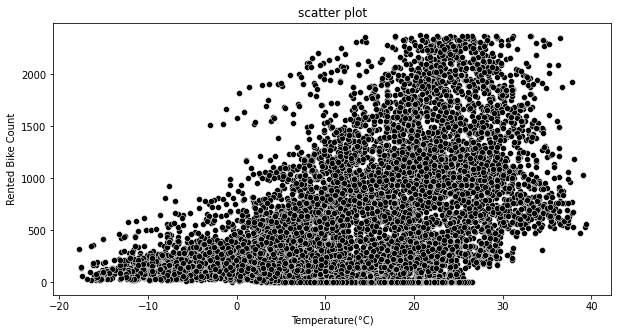

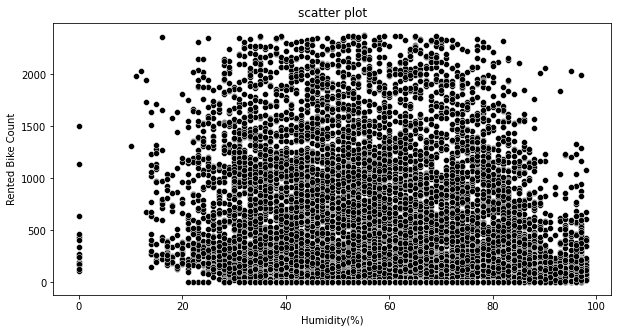

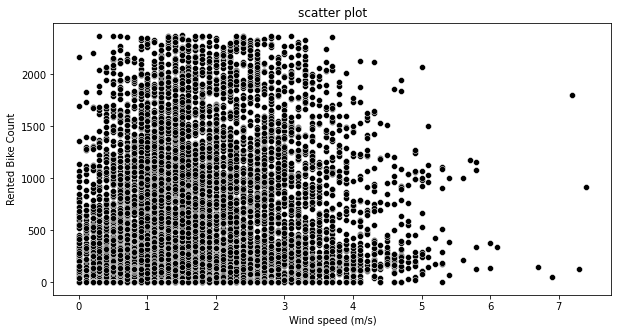

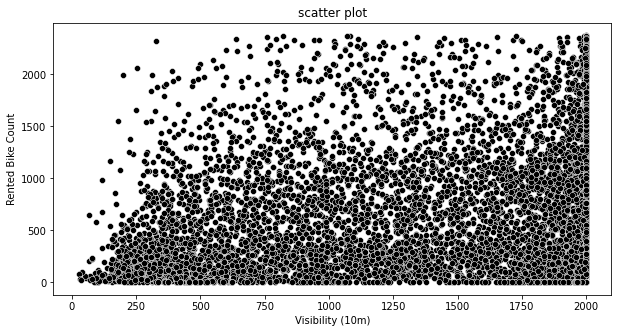

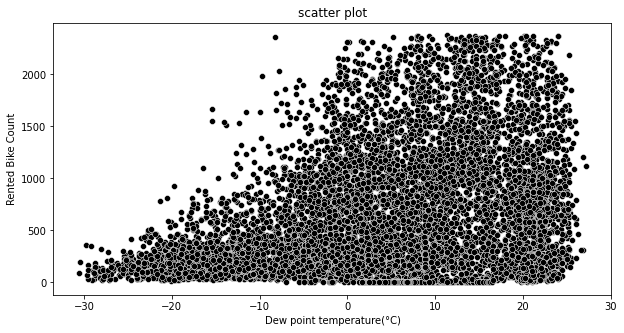

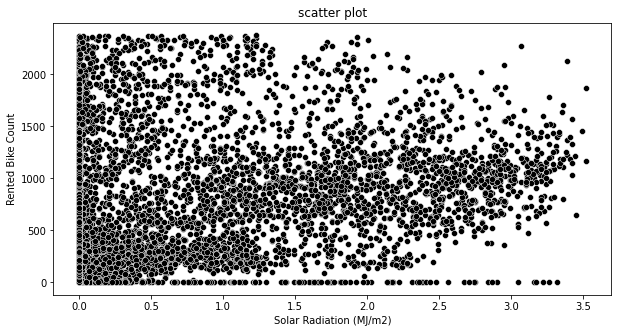

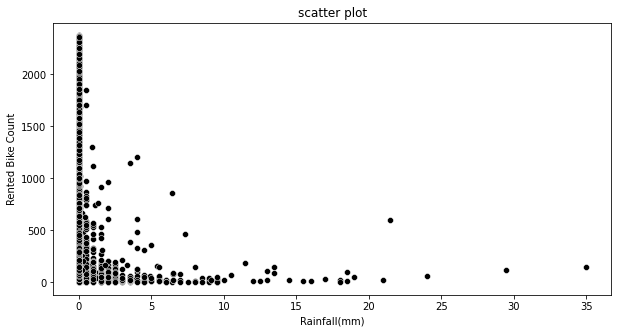

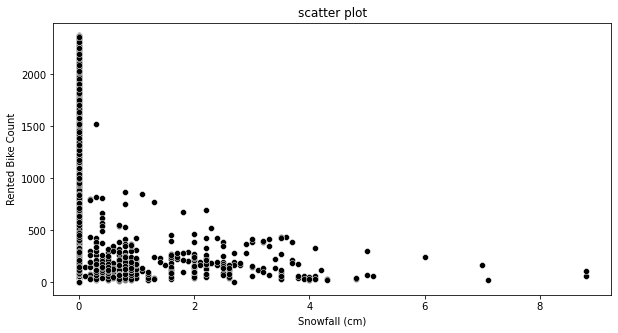

''

In [23]:
for i in numerical_features[1:]:
  
  sns.scatterplot(new_data[i],new_data['Rented Bike Count'],color='black')

  plt.title('scatter plot')
  plt.ylabel('Rented Bike Count')
  plt.xlabel(i)
  plt.show()
;

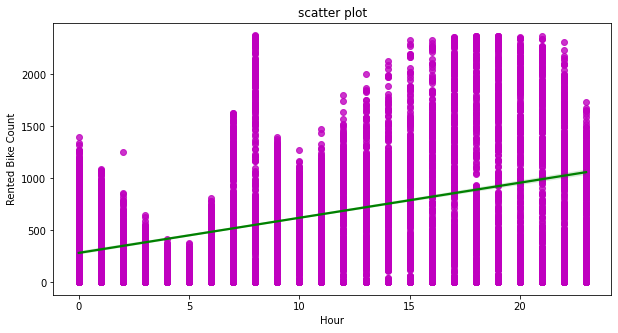

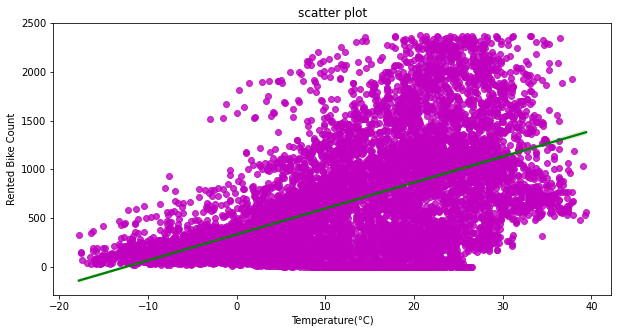

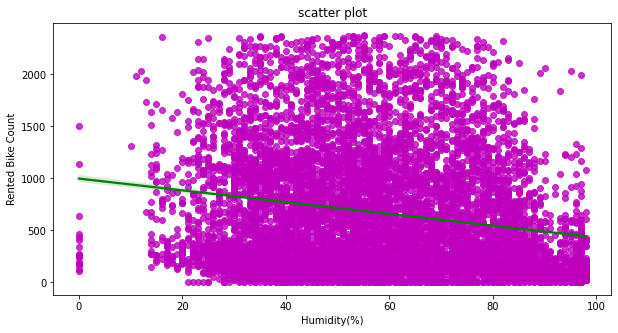

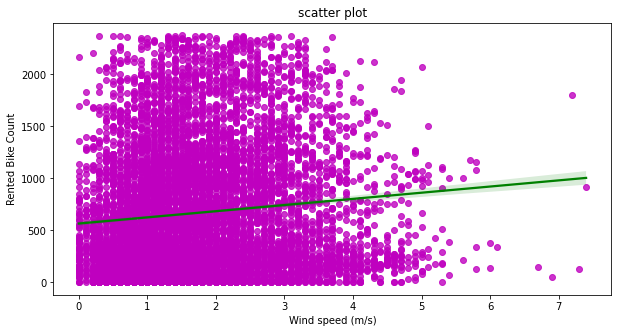

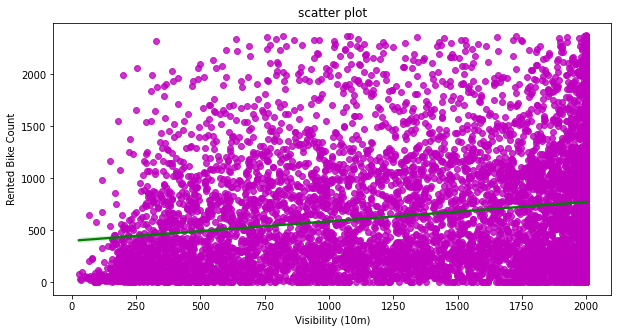

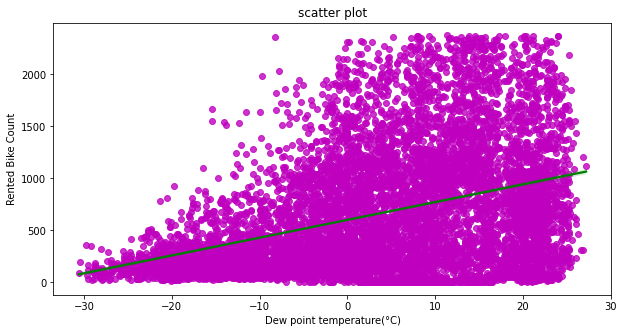

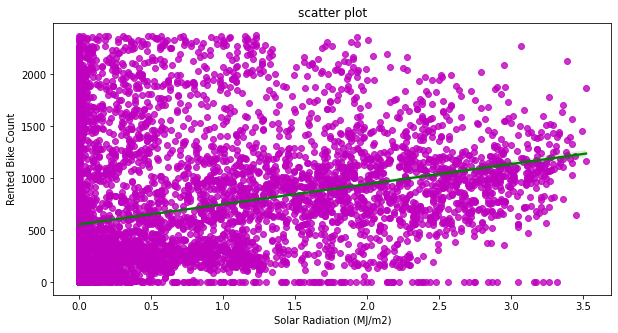

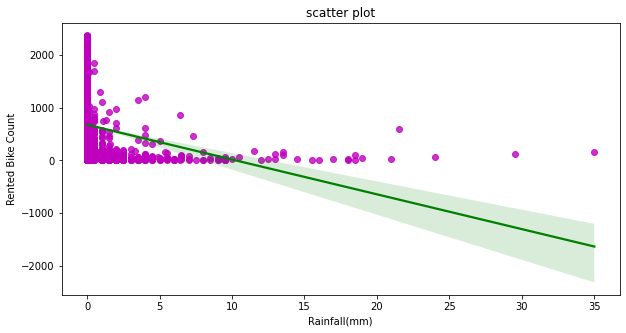

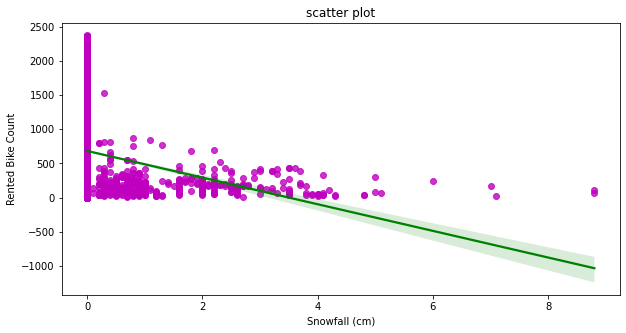

In [24]:
for i in numerical_features[1:]:
  
  sns.regplot(new_data[i],new_data['Rented Bike Count'],scatter_kws={"color": "m"}, line_kws={"color": "green"})

  plt.title('scatter plot')
  plt.ylabel('Rented Bike Count')
  plt.xlabel(i)
  plt.show()

With the help of scatter plot we drew some regression line on the numerical independent variables and dependent variable

In [25]:
#changing the datatype of date feature from object type to datetime .
new_data['Date'] = pd.to_datetime(new_data['Date'])


new_data['month']=new_data.Date.dt.month

new_data['Day_name']=new_data.Date.dt.day_name()
new_data['year']=new_data.Date.dt.year

In [26]:
new_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Day_name,year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017


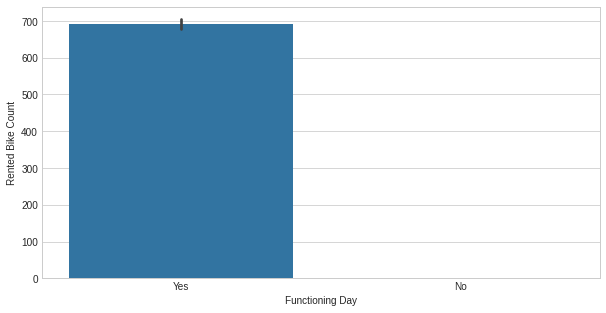

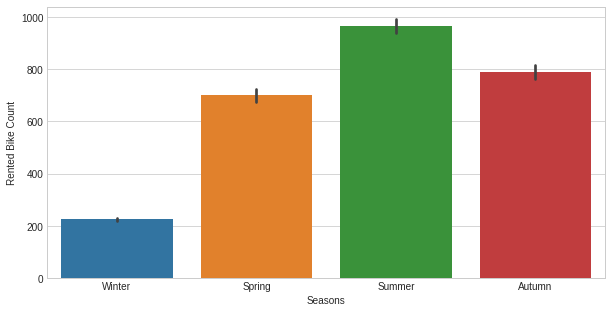

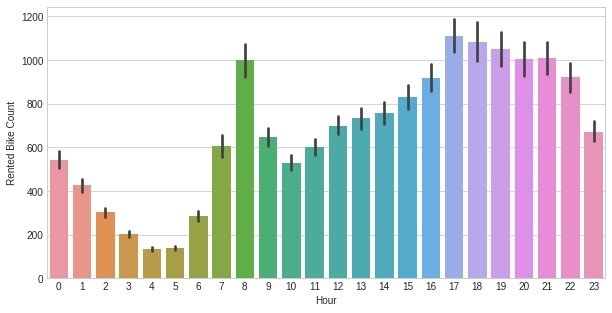

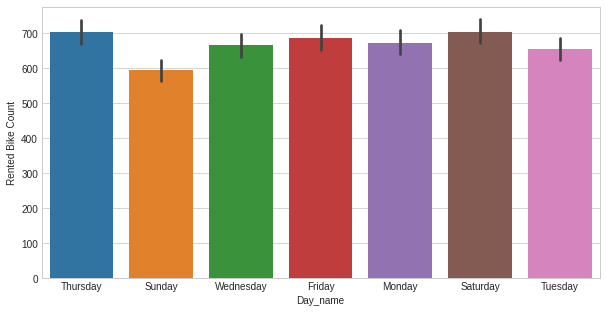

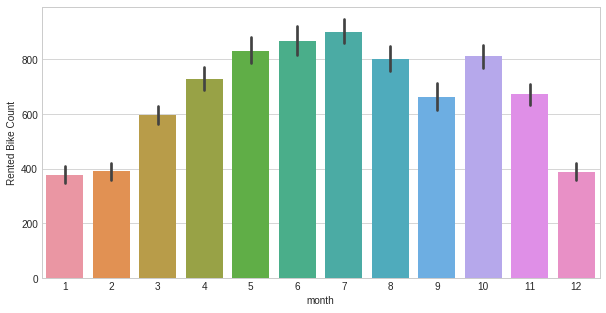

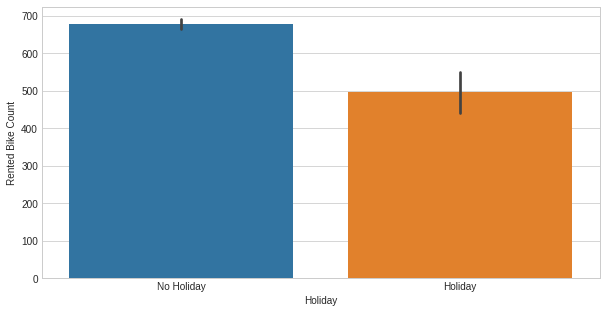

In [27]:
temp_list = ['Functioning Day','Seasons','Hour','Day_name', 'month','Holiday']
for col in temp_list:
  plt.figure()
  plt.style.use('seaborn-whitegrid')
  plots = sns.barplot(data=new_data,x=col,y='Rented Bike Count')

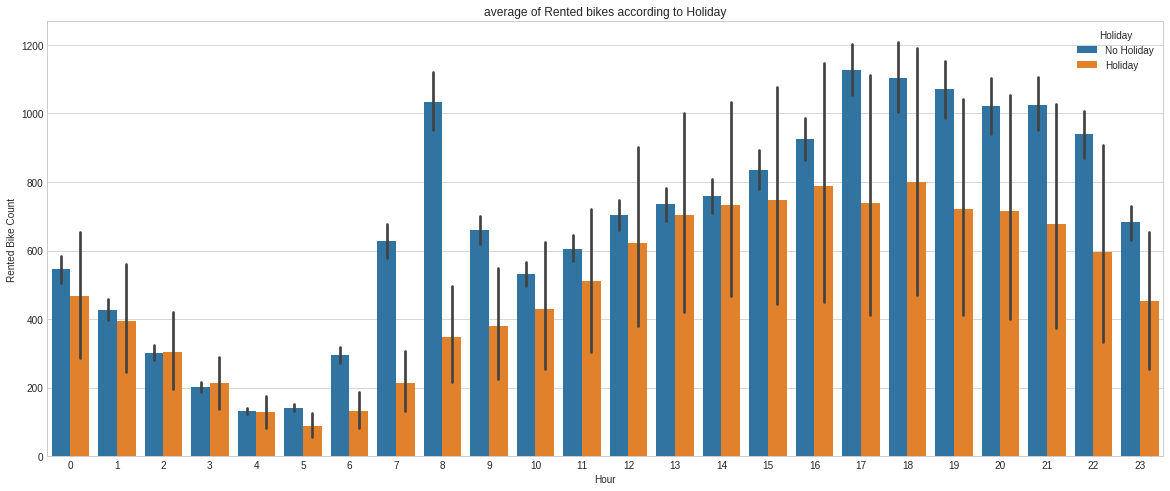

In [28]:
#Look into the bike rental based on 'holiday' on the basis of 'hour', 'week', 'month', 'season'
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=new_data,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='average of Rented bikes according to Holiday');

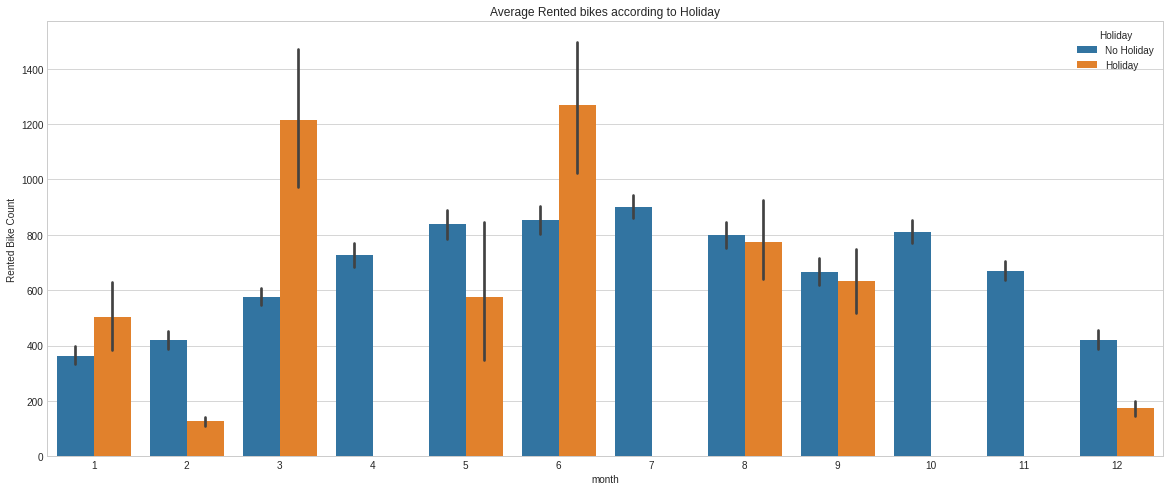

In [29]:
#Look into the bike rental based on 'holiday' on the basis of 'hour', 'week', 'month', 'season'
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=new_data,x='month',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Average Rented bikes according to Holiday');

Let's look into the pattern of the rented bikes on the basis of 'temperature', 'humidity', 'wind_speed', 'visibility', 'solar_radition', 'rainfall', 'snowfall'

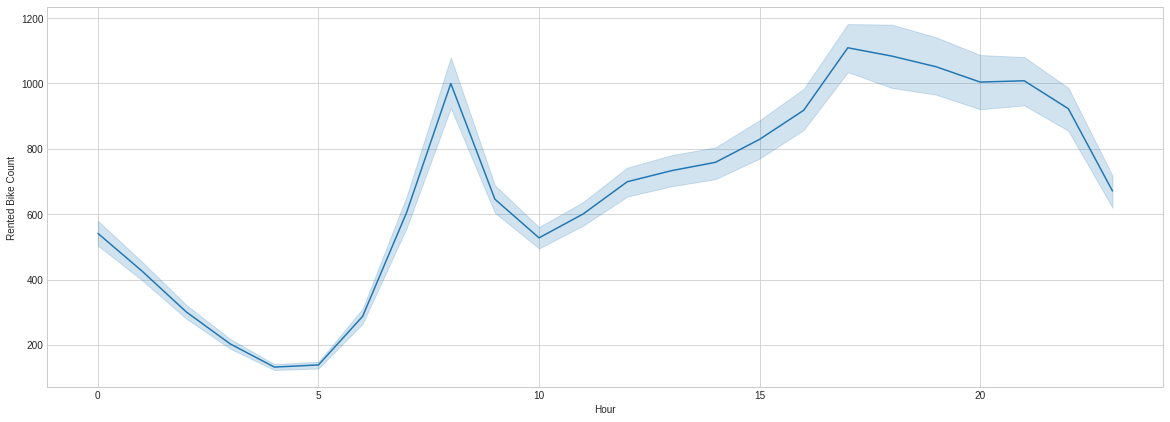

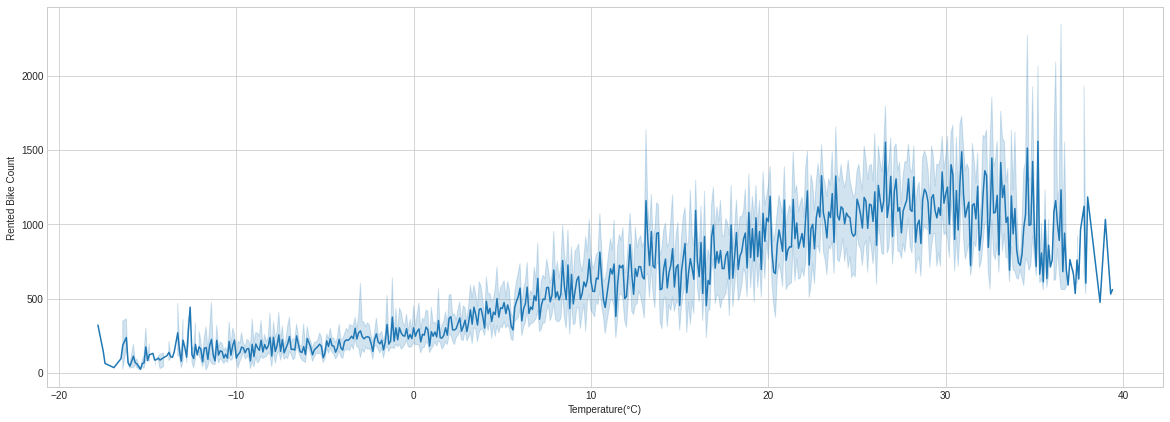

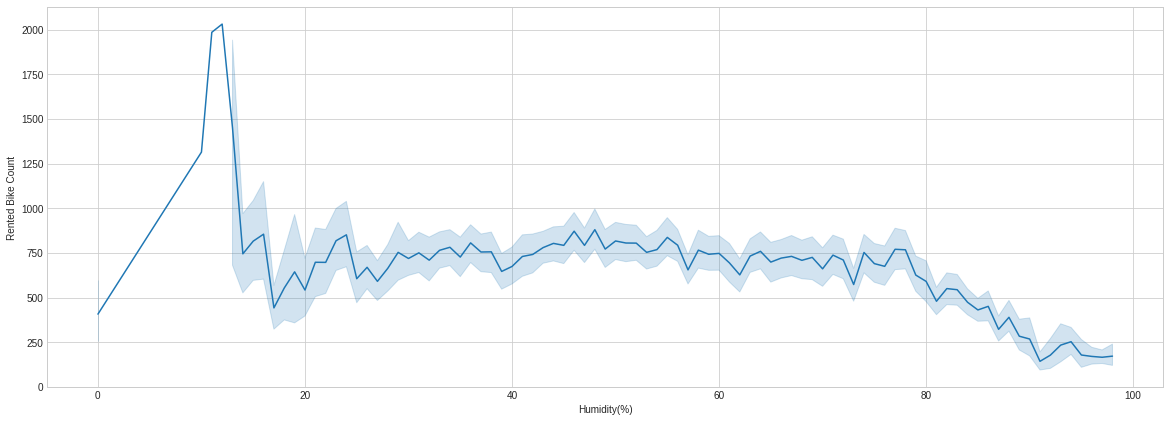

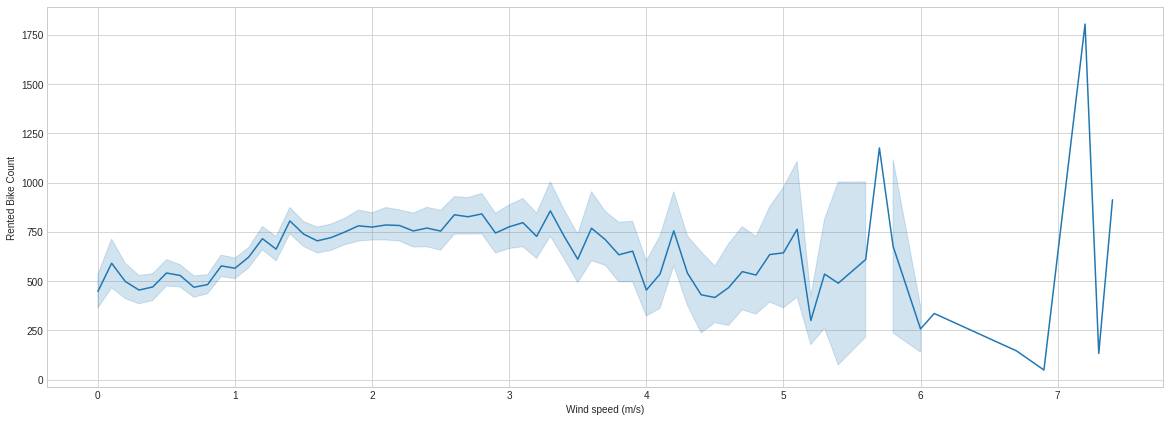

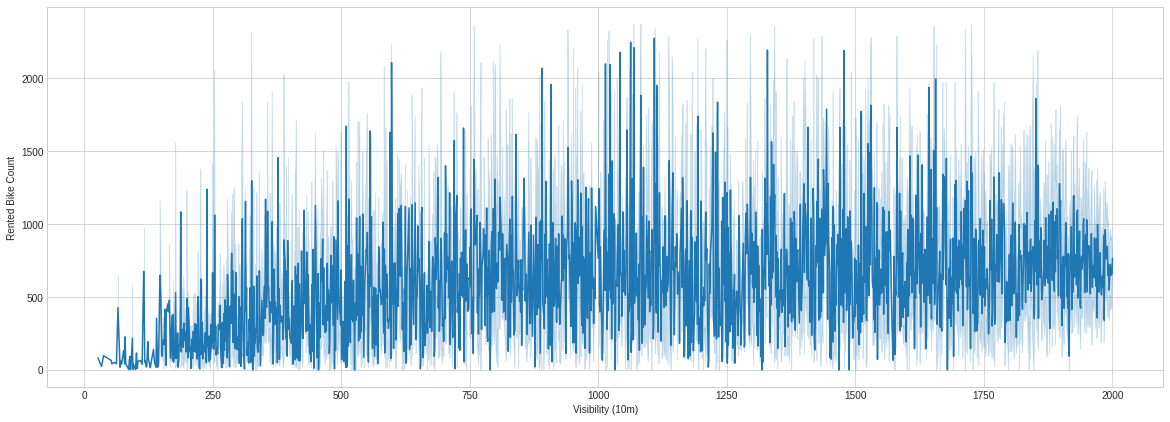

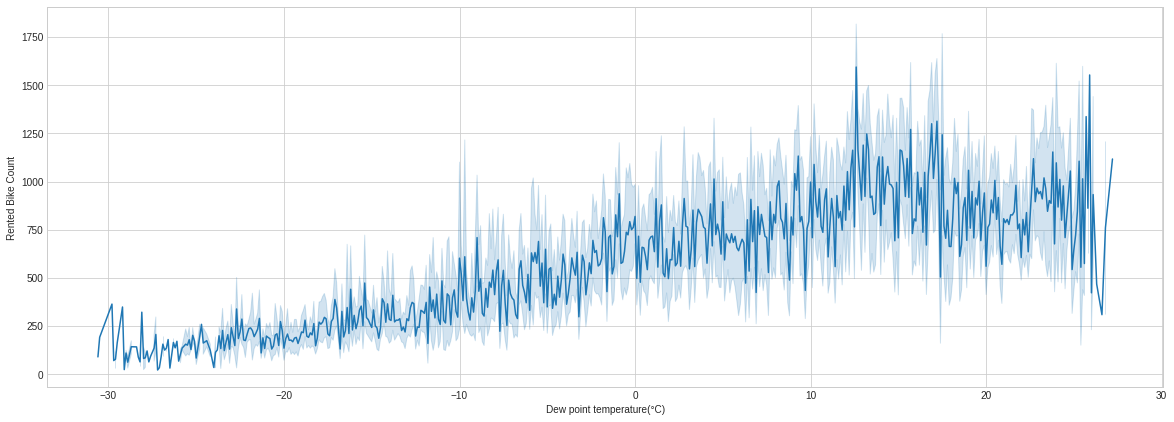

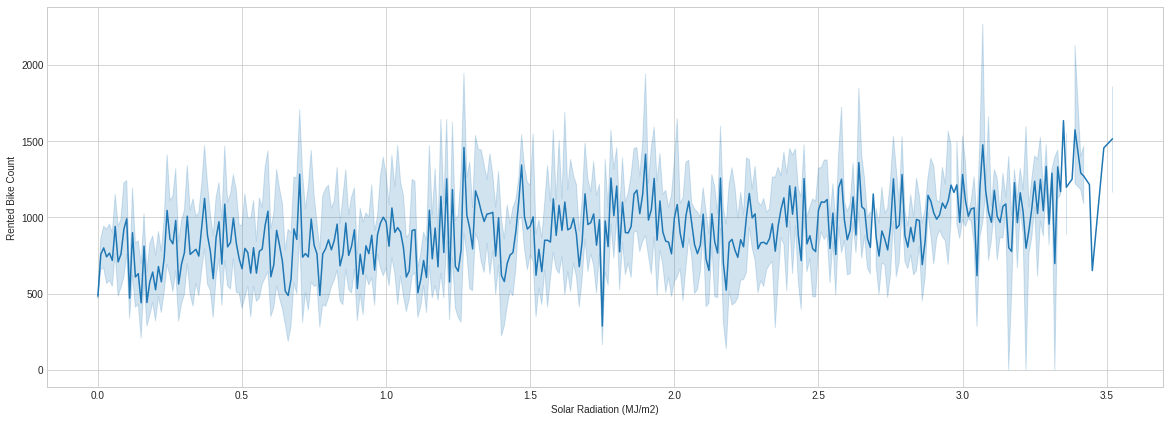

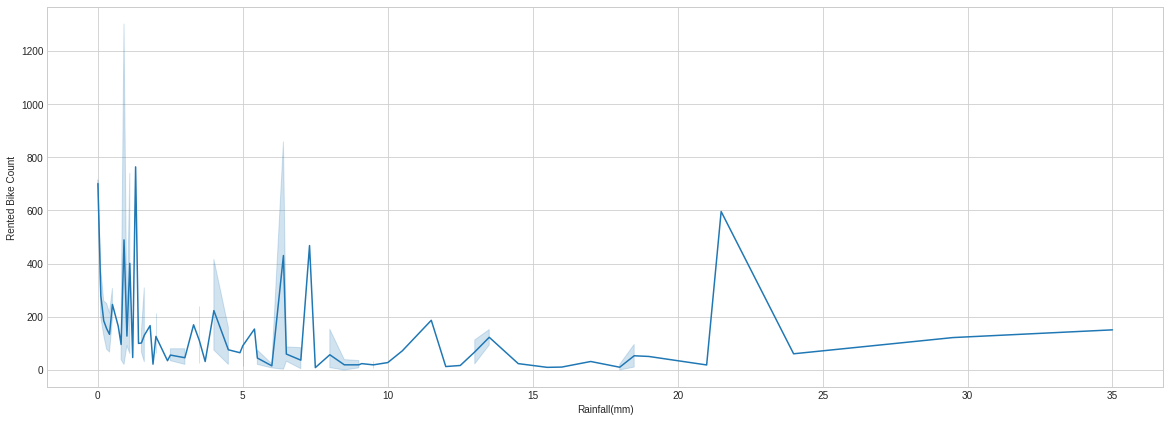

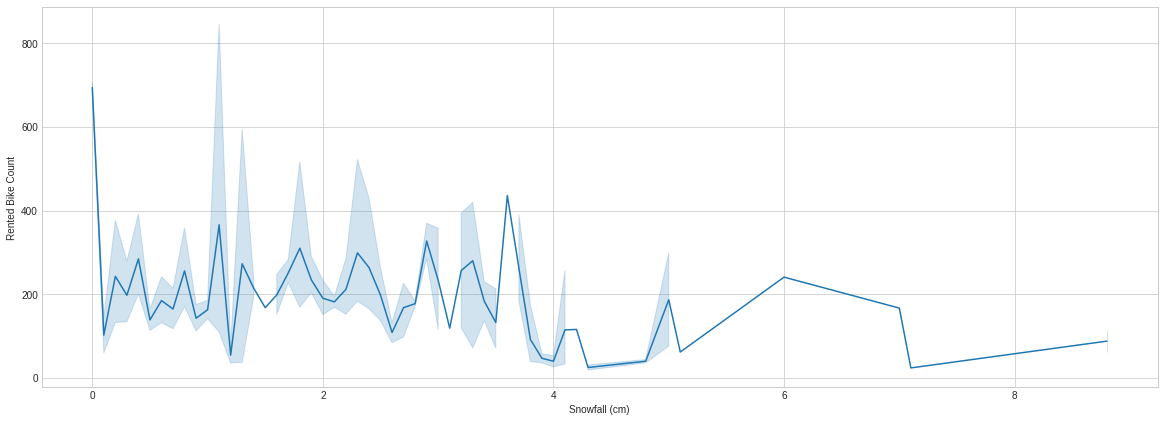

In [30]:
temp_list2 = ['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
for col in temp_list2:
  plt.figure(figsize=(20,7))
  
  plots = sns.lineplot(data=new_data,x=col,y='Rented Bike Count')

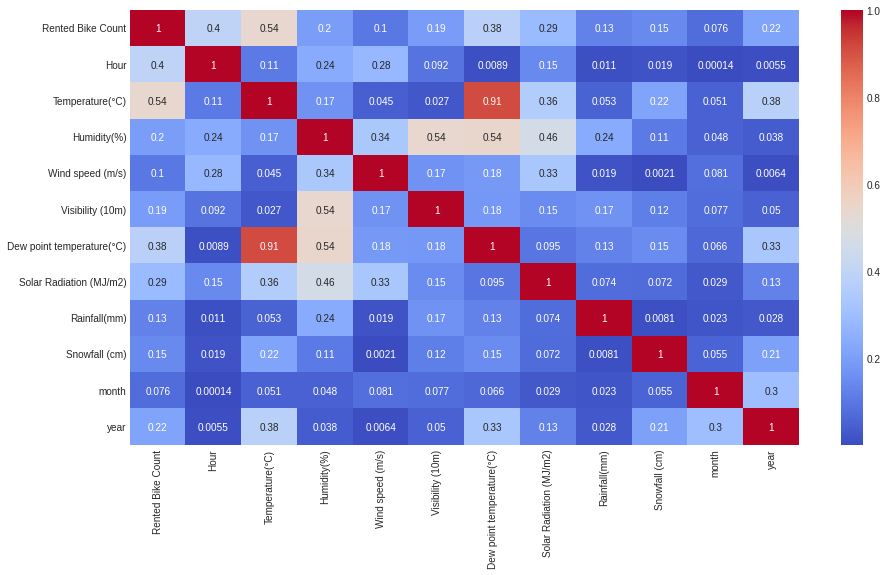

In [31]:
plt.figure(figsize=(15,8))
correlation = new_data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm');

**from the above heatmap we can there are some features which have correlation between them. the maximum correlation is between Dew Point Temperature and Temperature then humidity and visiblilty**

# **1. linear regression**

In [32]:
# checking for multicollinearity with the help of VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(new_data):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = new_data.columns
    vif["VIF"] = [variance_inflation_factor(new_data.values, i) for i in range(new_data.shape[1])]

    return(vif)

In [33]:
calc_vif(new_data[[i for i in new_data.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.342032
1,Temperature(°C),187.437533
2,Humidity(%),188.653814
3,Wind speed (m/s),4.792025
4,Visibility (10m),10.331501
5,Dew point temperature(°C),128.262905
6,Solar Radiation (MJ/m2),2.929473
7,Rainfall(mm),1.104568
8,Snowfall (cm),1.134331
9,month,4.686302


**From the above experiment i can conclude that Temperature and Dew point temperature(°C) has the VIF more than 10 . so we have to remove one of them then see and year also have high vif so we have to remove it**

In [34]:
new_data.drop(['Dew point temperature(°C)','year'], axis = 1,inplace=True)

In [35]:
calc_vif(new_data[[i for i in new_data.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,3.865340
1,Temperature(°C),3.208255
2,Humidity(%),6.051221
3,Wind speed (m/s),4.572058
4,Visibility (10m),5.259014
5,Solar Radiation (MJ/m2),2.290082
6,Rainfall(mm),1.081763
7,Snowfall (cm),1.125653
8,month,4.543682


now our dataset features have VIF of less than 10. so now our numerical features do not multicollinearity.

# feature engineering

In [36]:
new_data['Functioning Day']=new_data['Functioning Day'].apply(lambda x : 1 if(x=="Yes") else 0)
new_data['Holiday']=new_data['Holiday'].apply(lambda x : 1 if(x=="No Holiday") else 0)


In [37]:
linear_df=new_data.copy()

In [38]:
linear_df.shape

(8602, 15)

In [39]:
#one hot encoding on categorical variables(we are doing one hot encoding on hour variable because we have to predict the bike count on the hourly basis.)
linear_df= pd.get_dummies(linear_df, columns=['month','Hour','Day_name'], prefix=['month','Hour','Day_name'])


In [40]:
linear_df.head(5)

,Date,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,...,Hour_21,Hour_22,Hour_23,Day_name_Friday,Day_name_Monday,Day_name_Saturday,Day_name_Sunday,Day_name_Thursday,Day_name_Tuesday,Day_name_Wednesday
0,2017-01-12,254,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,...,0,0,0,0,0,0,0,1,0,0
1,2017-01-12,204,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,...,0,0,0,0,0,0,0,1,0,0
2,2017-01-12,173,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,...,0,0,0,0,0,0,0,1,0,0
3,2017-01-12,107,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,...,0,0,0,0,0,0,0,1,0,0
4,2017-01-12,78,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,...,0,0,0,0,0,0,0,1,0,0


In [41]:
linear_df.drop(['Date'],axis=1,inplace=True)
#linear_df.drop(['Day_name'],axis=1,inplace=True)
linear_df.drop(['Seasons'],axis=1,inplace=True)

In [42]:
linear_df.shape

(8602, 53)

In [43]:
# Create a list of independent variables
dependent_variable='Rented Bike Count'


independent_variables = list(set(linear_df.columns.tolist()) - {dependent_variable})

In [44]:
independent_variables

['Snowfall (cm)',
 'Hour_5',
 'Hour_3',
 'Humidity(%)',
 'month_12',
 'month_6',
 'Hour_15',
 'Hour_19',
 'Hour_1',
 'Day_name_Tuesday',
 'Hour_10',
 'Hour_0',
 'month_11',
 'Hour_22',
 'month_10',
 'Hour_23',
 'Hour_12',
 'Hour_2',
 'Day_name_Saturday',
 'Hour_16',
 'month_3',
 'month_7',
 'Solar Radiation (MJ/m2)',
 'Hour_9',
 'month_2',
 'Hour_4',
 'month_9',
 'Day_name_Friday',
 'Hour_8',
 'month_4',
 'Functioning Day',
 'Hour_20',
 'Hour_14',
 'month_1',
 'Day_name_Thursday',
 'Temperature(°C)',
 'month_5',
 'Hour_11',
 'Visibility (10m)',
 'Wind speed (m/s)',
 'Rainfall(mm)',
 'Day_name_Sunday',
 'month_8',
 'Hour_21',
 'Day_name_Wednesday',
 'Hour_7',
 'Hour_13',
 'Hour_17',
 'Hour_18',
 'Holiday',
 'Day_name_Monday',
 'Hour_6']

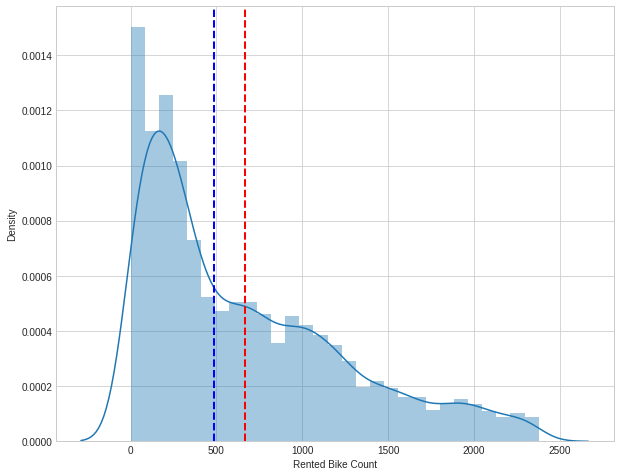

In [45]:
#Remove the skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
ax=sns.distplot(linear_df['Rented Bike Count'])
ax.axvline((linear_df['Rented Bike Count']).mean(), color='r', linestyle='dashed', linewidth=2)
ax.axvline((linear_df['Rented Bike Count']).median(), color='b', linestyle='dashed', linewidth=2)

plt.show()

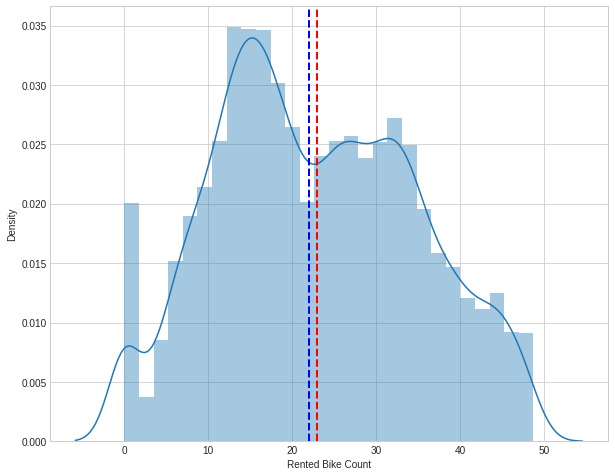

In [46]:
#lets try suareroot transformation for removing skewnwss
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
ax=sns.distplot(np.sqrt(linear_df['Rented Bike Count']))
ax.axvline(np.sqrt((linear_df['Rented Bike Count'])).mean(), color='r', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt((linear_df['Rented Bike Count'])).median(), color='b', linestyle='dashed', linewidth=2)

plt.show()

**After doing the transformation on our dependent variable we will get less skewed curve hence we take this forward**

**Train test split**

In [47]:
X=linear_df[independent_variables].values
y=np.sqrt(linear_df[dependent_variable])

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.25, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6451, 52)
(2151, 52)


In [49]:
#scaling with the help of MinMax scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
X_train[0:10]

array([[0.        , 0.        , 0.        , 0.28571429, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.29261364, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.41300527, 0.        , 0.        , 0.58590978, 0.23287671,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.39795918, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.     

In [51]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predicting the Test set results
y_pred_train=regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [53]:
print(y_pred_test)
print(y_test)

[26.6796875 -0.1171875 21.125     ... 17.453125  32.71875   31.5078125]
4248    33.000000
3154     0.000000
140     13.784049
6375    28.930952
7654    37.107951
          ...    
4931    29.495762
8688    21.213203
2767    24.103942
5578    26.438608
3407    31.432467
Name: Rented Bike Count, Length: 2151, dtype: float64


In [54]:
regressor.coef_

array([-1.91759609e+00, -9.77121195e+11, -9.77121195e+11, -1.22129789e+01,
        2.90592531e+13,  2.90592531e+13, -9.77121195e+11, -9.77121195e+11,
       -9.77121195e+11,  8.05612500e+12, -9.77121195e+11, -9.77121195e+11,
        2.90592531e+13, -9.77121195e+11,  2.90592531e+13, -9.77121195e+11,
       -9.77121195e+11, -9.77121195e+11,  8.05612500e+12, -9.77121195e+11,
        2.90592531e+13,  2.90592531e+13,  3.67332923e+00, -9.77121195e+11,
        2.90592531e+13, -9.77121195e+11,  2.90592531e+13,  8.05612500e+12,
       -9.77121195e+11,  2.90592531e+13,  2.55500709e+01, -9.77121195e+11,
       -9.77121195e+11,  2.90592531e+13,  8.05612500e+12,  3.08710938e+01,
        2.90592531e+13, -9.77121195e+11,  1.29296875e+00, -2.84765625e+00,
       -5.03984375e+01,  8.05612500e+12,  2.90592531e+13, -9.77121195e+11,
        8.05612500e+12, -9.77121195e+11, -9.77121195e+11, -9.77121195e+11,
       -9.77121195e+11,  2.06250000e+00,  8.05612500e+12, -9.77121195e+11])

In [55]:
#evalution matrix
print('MSE on train set:', mean_squared_error(y_train**2, y_pred_train**2))
print('MSE on test set:',mean_squared_error(y_test**2, y_pred_test**2))

MSE on train set: 112047.80164425813
MSE on test set: 104502.31711156739


In [56]:
RMSE_train = np.sqrt(mean_squared_error(y_train**2, y_pred_train**2))
print("RMSE on train set:" ,RMSE_train)
RMSE_test = np.sqrt(mean_squared_error(y_test**2, y_pred_test**2))
print("RMSE on test set:" ,RMSE_test)


RMSE on train set: 334.7354203610041
RMSE on test set: 323.26818140913184


In [57]:
r2_train=r2_score(y_train**2, y_pred_train**2)
print("R2 on train set :" ,r2_train)
print("Adjusted R2 on train set : ",1-(1-r2_score((y_train)**2, (y_pred_train)**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
r2_test=r2_score(y_test**2, y_pred_test**2)
print("R2 on test set:" ,r2_test)
print("Adjusted R2 on test set : ",1-(1-r2_score((y_test)**2, (y_pred_test)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 on train set : 0.6804002994564416
Adjusted R2 on train set :  0.6778027401522426
R2 on test set: 0.6911554252455664
Adjusted R2 on test set :  0.6835005549466004


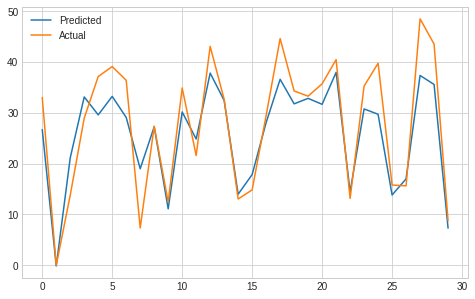

In [58]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_test[:30])
plt.plot(np.array(y_test[:30]))
plt.legend(["Predicted","Actual"])
plt.show()

**R2 score of linear regression model is approaximate 0.69 and adjusted R2 score is .68.
hence we have to go for the more models like Lasso,Ridge and if the efficiency wont increase in the sufficient way then we have to go to the more advance model like XGBoost, Randomforest etc**

# 2. Lasso regression with cross validation.

In [59]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [60]:
y_pred_lasso= lasso.predict(X_test)

In [61]:
r2_score(y_test**2, y_pred_lasso**2)

0.5864487626386183

**hyper parameter tunning and cross validation**

In [62]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [63]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.001}


*from the above gridsearchcv model we get the best alpha is 0.001*

In [64]:
y_pred_train_lassocv=lasso_regressor.predict(X_train)
y_pred_test_lassocv = lasso_regressor.predict(X_test)


In [65]:
print('MSE on train set:', mean_squared_error(y_train**2, y_pred_train_lassocv**2))
print('MSE on test set:',mean_squared_error(y_test**2, y_pred_test_lassocv**2))

MSE on train set: 112329.80960441267
MSE on test set: 104698.69200295581


In [66]:
RMSE_train = np.sqrt(mean_squared_error(y_train**2, y_pred_train_lassocv**2))
print("RMSE on train set:" ,RMSE_train)
RMSE_test = np.sqrt(mean_squared_error(y_test**2, y_pred_test_lassocv**2))
print("RMSE on test set:" ,RMSE_test)


RMSE on train set: 335.156395738486
RMSE on test set: 323.5717725682446


In [67]:
r2_train=r2_score(y_train**2, y_pred_train_lassocv**2)
print("R2 on train set :" ,r2_train)
print("Adjusted R2 on train set : ",1-(1-r2_score((y_train)**2, (y_pred_train_lassocv)**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
r2_test=r2_score(y_test**2, y_pred_test_lassocv**2)
print("R2 on test set:" ,r2_test)
print("Adjusted R2 on test set : ",1-(1-r2_score((y_test)**2, (y_pred_test_lassocv)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 on train set : 0.6795959136648984
Adjusted R2 on train set :  0.6769918166831188
R2 on test set: 0.690575061847896
Adjusted R2 on test set :  0.6829058069461279


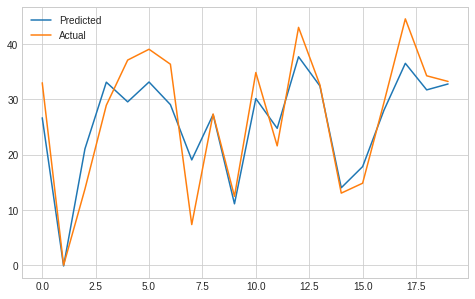

In [68]:
plt.figure(figsize=(8,5))
plt.plot(((y_pred_test_lassocv[:20])))
plt.plot(np.array((y_test[:20])))
plt.legend(["Predicted","Actual"])
plt.show()

**from the Lasso we also get the same r2score as we got from linear regression i.e, ~0.69**

# 3. Ridge regression implementation

In [69]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [70]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 1}


*for the ridge alpha is 1*

In [71]:
y_pred_train_ridgecv=ridge_regressor.predict(X_train)
y_pred_test_ridgecv=ridge_regressor.predict(X_test)

In [72]:
#evalution matrix
print('MSE on train set:', mean_squared_error(y_train**2, y_pred_train_ridgecv**2))
print('MSE on test set:',mean_squared_error(y_test**2, y_pred_test_ridgecv**2))

MSE on train set: 112780.35564991985
MSE on test set: 105169.11181943775


In [73]:
RMSE_train = np.sqrt(mean_squared_error(y_train**2, y_pred_train_ridgecv**2))
print("RMSE on train set:" ,RMSE_train)
RMSE_test = np.sqrt(mean_squared_error(y_test**2, y_pred_test_ridgecv**2))
print("RMSE on test set:" ,RMSE_test)

RMSE on train set: 335.8278661009533
RMSE on test set: 324.29787513864125


In [74]:
r2_train=r2_score(y_train**2, y_pred_train_ridgecv**2)
print("R2 on train set :" ,r2_train)
print("Adjusted R2 on train set : ",1-(1-r2_score((y_train)**2, (y_pred_train_ridgecv)**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
r2_test=r2_score(y_test**2, y_pred_test_ridgecv**2)
print("R2 on test set:" ,r2_test)
print("Adjusted R2 on test set : ",1-(1-r2_score((y_test)**2, (y_pred_test_ridgecv)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 on train set : 0.6783107980346753
Adjusted R2 on train set :  0.6756962562243913
R2 on test set: 0.6891847902042316
Adjusted R2 on test set :  0.6814810767107236


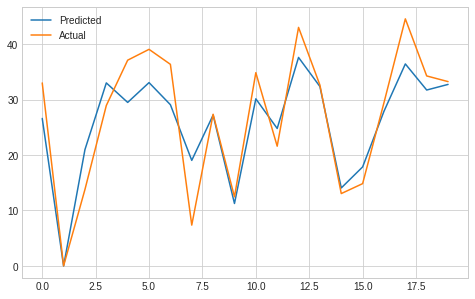

In [75]:
plt.figure(figsize=(8,5))
plt.plot(((y_pred_test_ridgecv[:20])))
plt.plot(np.array((y_test[:20])))
plt.legend(["Predicted","Actual"])
plt.show()

**in ridge regression R2 score got slightly decreased to .68**

#4. elastic net regression

In [76]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [77]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.1}


In [78]:
y_pred_train_elastic = elastic_regressor.predict(X_train)
y_pred_test_elastic = elastic_regressor.predict(X_test)


In [79]:
#evalution matrix
print('MSE on train set:', mean_squared_error(y_train**2, y_pred_train_elastic**2))
print('MSE on test set:',mean_squared_error(y_test**2, y_pred_test_elastic**2))

MSE on train set: 112495.56485422804
MSE on test set: 104898.72422815731


In [80]:
RMSE_train = np.sqrt(mean_squared_error(y_train**2, y_pred_train_elastic**2))
print("RMSE on train set:" ,RMSE_train)
RMSE_test = np.sqrt(mean_squared_error(y_test**2, y_pred_test_elastic**2))
print("RMSE on test set:" ,RMSE_test)

RMSE on train set: 335.4035850348473
RMSE on test set: 323.8807253112746


In [81]:
r2_train=r2_score(y_train**2, y_pred_train_elastic**2)
print("R2 on train set :" ,r2_train)
print("Adjusted R2 on train set : ",1-(1-r2_score((y_train)**2, (y_pred_train_elastic)**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
r2_test=r2_score(y_test**2, y_pred_test_elastic**2)
print("R2 on test set:" ,r2_test)
print("Adjusted R2 on test set : ",1-(1-r2_score((y_test)**2, (y_pred_test_elastic)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 on train set : 0.6791231214509761
Adjusted R2 on train set :  0.6765151818316342
R2 on test set: 0.6899838896209338
Adjusted R2 on test set :  0.682299982214017


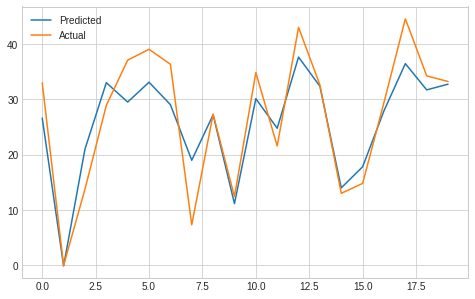

In [82]:
plt.figure(figsize=(8,5))
plt.plot(((y_pred_test_elastic[:20])))
plt.plot(np.array((y_test[:20])))
plt.legend(["Predicted","Actual"])
plt.show()

**From the above 4 models(i.e, linear,lasso,ridge,elastic net) all have the approximate same r2score(0.69), MSME(104898.75), RMSE(323.88)**

# **Advance models**

# 1. Decision Tree

In [83]:
df=linear_df.copy()

In [84]:
X=df[independent_variables].values
y=df[dependent_variable].values
# train test split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.25, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6451, 52)
(2151, 52)


In [85]:
# Applying decision tree with gridsearchCV
parameters = {'criterion':['squared_error',  'absolute_error', 'poisson'],'max_depth': [10,100,1000,10000],'max_leaf_nodes':[10,100,1000]}
decision_regressor=DecisionTreeRegressor()
decision_regressor = GridSearchCV(decision_regressor, parameters,cv=3)
decision_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [10, 100, 1000, 10000],
                         'max_leaf_nodes': [10, 100, 1000]})

In [86]:
decision_regressor.best_params_

{'criterion': 'absolute_error', 'max_depth': 100, 'max_leaf_nodes': 100}

In [87]:
train_preds_d =  decision_regressor.predict(X_train)
test_preds_d  = decision_regressor.predict(X_test)

In [88]:
#evalution matrix
print('MSE on train set:', mean_squared_error(y_train, train_preds_d))
print('MSE on test set:',mean_squared_error(y_test, test_preds_d))
RMSE_train = np.sqrt(mean_squared_error(y_train, train_preds_d))
print("RMSE on train set:" ,RMSE_train)
RMSE_test = np.sqrt(mean_squared_error(y_test, test_preds_d))
print("RMSE on test set:" ,RMSE_test)

MSE on train set: 60452.605487521316
MSE on test set: 87376.27928870294
RMSE on train set: 245.87111560230355
RMSE on test set: 295.59478900803197


In [89]:
# Obtain accuracy on train set
r2_train=r2_score(y_train, train_preds_d)
print("R2 on train set :" ,r2_train)
print("Adjusted R2 on train set : ",1-(1-r2_score((y_train), (train_preds_d)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
r2_test=r2_score(y_test, test_preds_d )
print("R2 on test set:" ,r2_test)
print("Adjusted R2 on test set : ",1-(1-r2_score((y_test), (test_preds_d )))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 on train set : 0.8275679279078496
Adjusted R2 on train set :  0.8261664793694327
R2 on test set: 0.7417694596021831
Adjusted R2 on test set :  0.735369083958386


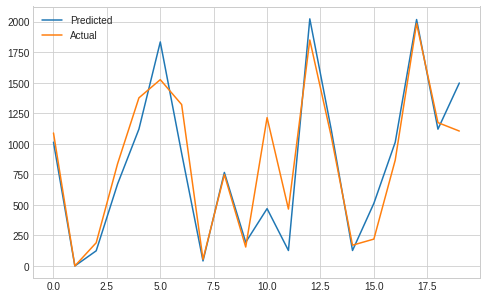

In [90]:
plt.figure(figsize=(8,5))
plt.plot(((test_preds_d[:20])))
plt.plot(np.array((y_test[:20])))
plt.legend(["Predicted","Actual"])
plt.show()

**From the decision tree we got r2score  test dataset.73 and adjusted r2score .73.**

# 2. GBM

In [91]:
model_gbm = GradientBoostingRegressor()
model_gbm.fit(X_train, y_train)

GradientBoostingRegressor()

In [92]:
train_preds_gbm =  model_gbm.predict(X_train)
test_preds_gbm  = model_gbm.predict(X_test)

In [93]:
#evalution matrix
print('MSE on train set:', mean_squared_error(y_train, train_preds_gbm))
print('MSE on test set:',mean_squared_error(y_test, test_preds_gbm))
RMSE_train = np.sqrt(mean_squared_error(y_train, train_preds_gbm))
print("RMSE on train set:" ,RMSE_train)
RMSE_test = np.sqrt(mean_squared_error(y_test, test_preds_gbm))
print("RMSE on test set:" ,RMSE_test)


MSE on train set: 66303.73504725947
MSE on test set: 73333.25394781605
RMSE on train set: 257.49511655031336
RMSE on test set: 270.80113357926706


In [94]:
# Obtain r2score on train and test set
r2_train=r2_score(y_train, train_preds_gbm)
print("R2 on train set :" ,r2_train)
print("Adjusted R2 on train set : ",1-(1-r2_score((y_train), (train_preds_gbm)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
r2_test=r2_score(y_test, test_preds_gbm)
print("R2 on test set:" ,r2_test)
print("Adjusted R2 on test set : ",1-(1-r2_score((y_test), (test_preds_gbm)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 on train set : 0.8108784504911393
Adjusted R2 on train set :  0.8093413575598387
R2 on test set: 0.7832720052829799
Adjusted R2 on test set :  0.7779002914005753


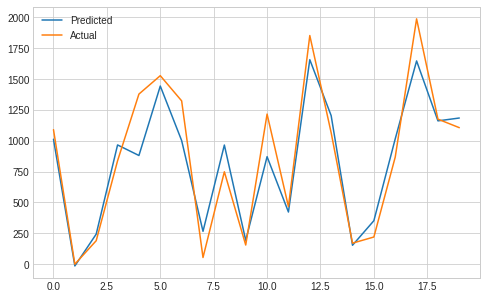

In [95]:
plt.figure(figsize=(8,5))
plt.plot(((test_preds_gbm[:20])))
plt.plot(np.array((y_test[:20])))
plt.legend(["Predicted","Actual"])
plt.show()

**In GBM we got r2score of .78 and adjusted r2score .77 on test data set**

# 3. Random forest 

In [96]:
# Applying random forest with gridsearchCV
parameters = {'n_estimators':[100,1000], 'max_depth': [10,100,1000,10000], 'max_leaf_nodes':[1,10,100,1000]}
model_rf = RandomForestRegressor() 
rf_regressor = GridSearchCV(model_rf, parameters,cv=3)
rf_regressor.fit(X_train, y_train)





GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 100, 1000, 10000],
                         'max_leaf_nodes': [1, 10, 100, 1000],
                         'n_estimators': [100, 1000]})

In [97]:
rf_regressor.best_params_

{'max_depth': 100, 'max_leaf_nodes': 1000, 'n_estimators': 1000}

In [98]:
train_preds_rf =  rf_regressor.predict(X_train)
test_preds_rf  = rf_regressor.predict(X_test)

In [99]:
#evalution matrix
print('MSE on train set:', mean_squared_error(y_train, train_preds_rf))
print('MSE on test set:',mean_squared_error(y_test, test_preds_rf))
RMSE_train = np.sqrt(mean_squared_error(y_train, train_preds_rf))
print("RMSE on train set:" ,RMSE_train)
RMSE_test = np.sqrt(mean_squared_error(y_test, test_preds_rf))
print("RMSE on test set:" ,RMSE_test)

MSE on train set: 8333.326866753623
MSE on test set: 49957.88020682252
RMSE on train set: 91.28705749860504
RMSE on test set: 223.51259518609353


In [100]:
# Obtain r2score on train and test set
r2_train=r2_score(y_train, train_preds_rf)
print("R2 on train set :" ,r2_train)
print("Adjusted R2 on train set : ",1-(1-r2_score((y_train), (train_preds_rf)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
r2_test=r2_score(y_test, test_preds_rf)
print("R2 on test set:" ,r2_test)
print("Adjusted R2 on test set : ",1-(1-r2_score((y_test), (test_preds_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 on train set : 0.9762304236936136
Adjusted R2 on train set :  0.9760372355148184
R2 on test set: 0.8523552329309915
Adjusted R2 on test set :  0.8486957820789474


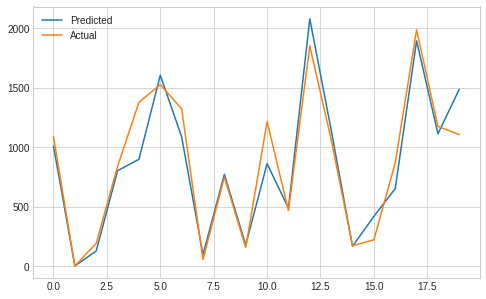

In [101]:
plt.figure(figsize=(8,5))
plt.plot(((test_preds_rf[:20])))
plt.plot(np.array((y_test[:20])))
plt.legend(["Predicted","Actual"])
plt.show()

**Random forest gives the highest r2score i.e, .85 and adjusted r2 is .84**

*from the above models Random forest refressor gives the highest r2score but it comes with some disadvantages like this model is range bound.*